# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [1]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [2]:
#mean
mean_sales = round(sum(sales)/len(sales),2)
mean_sales

3052.71

In [3]:
#Variance
(sum([(i-mean_sales)**2 for i in sales]))/(len(sales)-1)

214387.90478333333

In [4]:
#Standard Deviation
((sum([(i-mean_sales)**2 for i in sales]))/(len(sales)))**(1/2)

428.67360688857104

In [5]:
def get_stats(stats_list):
    sales_mean = sum(stats_list)/len(stats_list)
    variance = (sum([(i-sales_mean)**2 for i in stats_list]))/(len(stats_list)-1)
    std_dev = ((sum([(i-sales_mean)**2 for i in stats_list]))/(len(stats_list)))**(1/2)
    samp_size = len(stats_list)
    return {'mean':sales_mean, 
            'variance':variance,
            'std_dev':std_dev,
            'sample_size':samp_size}

In [6]:
sales_stats_list = get_stats(sales)
print('Mean: ', round(sales_stats_list['mean'], 2),
      '\nVariance: ', round(sales_stats_list['variance'], 2),
      '\nStandard Deviation: ', round(sales_stats_list['std_dev'], 2))

Mean:  3052.71 
Variance:  214387.9 
Standard Deviation:  428.67


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [7]:
import pandas as pd
import numpy as np

In [8]:
sales_df = pd.DataFrame(sales, columns=['sales'])
sales_df['cust_count'] = [127, 80, 105, 92, 120, 115, 93]

In [9]:
sales_df

,sales,cust_count
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [10]:
round(sales_df.cov(), 2)

,sales,cust_count
sales,214387.90,7604.36
cust_count,7604.36,290.95


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [11]:
cust_std = get_stats(sales_df['cust_count'])['std_dev']
print('Customer Count Standard Deviation: :', cust_std)

Customer Count Standard Deviation: : 15.792015549069118


In [12]:
sales_std = get_stats(sales_df['sales'])['std_dev']
print('Sales Standard Deviation: :', sales_std)

Sales Standard Deviation: : 428.67360686714756


In [13]:
sales_df.cov()

,sales,cust_count
sales,214387.904762,7604.357143
cust_count,7604.357143,290.952381


In [14]:
(sales_df.corr())/(sales_std*cust_std)

,sales,cust_count
sales,0.000148,0.000142
cust_count,0.000142,0.000148


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [15]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [16]:
titanic.drop('Unnamed: 0', axis=1, inplace=True)

In [17]:
titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest',
       'has_cabin_number'],
      dtype='object')

In [18]:
titanic.dtypes

pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [19]:
col_filt = titanic.columns[titanic.dtypes!='object']

In [20]:
titanic[col_filt].head()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
0,1.0,1.0,29.0000,0.0,0.0,211.3375,NaN,1
1,1.0,1.0,0.9167,1.0,2.0,151.5500,NaN,1
2,1.0,0.0,2.0000,1.0,2.0,151.5500,NaN,1
3,1.0,0.0,30.0000,1.0,2.0,151.5500,135.0,1
4,1.0,0.0,25.0000,1.0,2.0,151.5500,NaN,1


In [21]:
titanic.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [22]:
titanic.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [23]:
import matplotlib.pyplot as plt


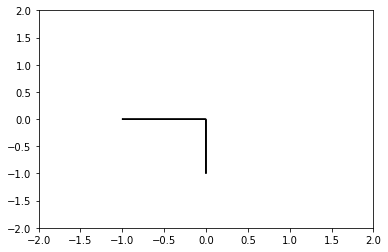

In [24]:
vector1 = [-1,0]
vector2 = [0,-1]

plt.arrow(0,0, vector1[0], vector1[1])
plt.arrow(0,0, vector2[0], vector2[1])
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [25]:
#Not orthogonal because their dot product is not zero

a = [-5, 3,7]
b = [6, -8, 2]
np.dot(a,b)

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [27]:
c = np.array([2, -15, 6, 20])

In [28]:
c.T

array([  2, -15,   6,  20])

In [29]:
np.matmul(c, c.T)

665

In [30]:
def norm(list):
    list2 = np.array([i**2 for i in list])
    return (list2.sum())**(1/2)

In [31]:
norm(c)**2

665.0

In [32]:
print(c*c)
(c*c).sum()

[  4 225  36 400]


665

In [34]:
cT = np.array([[2],
      [-15],
      [6],
      [20]])

In [35]:
#dont use asterisks, use np.matmul()

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

d=7[1,0]+12[0,1]

e=2[1,0,0]+11[0,1,0]+8[0,0,-1]

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [36]:
f = np.array([4,12,11,9,2])

f_norm = norm(f)
f_norm

19.131126469708992

In [40]:
f_unit = f/f_norm
f_unit

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [43]:
xd = [.1, .2]
yd = [0, 0]
xi = [.2, .1]
yi = [.1, .1]

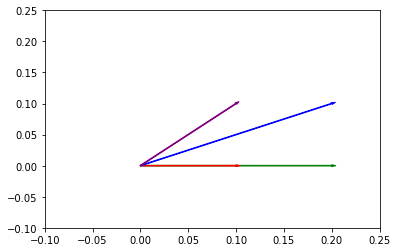

In [44]:
plt.arrow(0, 0, xd[1], yd[1], color='g')
plt.arrow(0, 0, xd[0], yd[0], color='r')

plt.arrow(0, 0, xi[0], yi[0], color='b')
plt.arrow(0, 0, xi[1], yi[1], color='purple')

plt.xlim(-.1, .25)
plt.ylim(-.1, .25)

plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

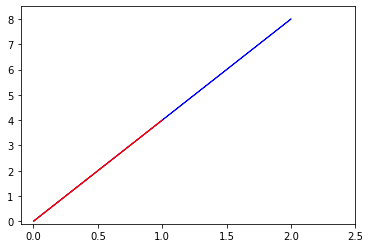

In [46]:
#span is a 1 dimensional line

g = np.array([1, 2])
h = np.array([4, 8])

plt.arrow(0,0,g[1],h[1],color='b')
plt.arrow(0,0,g[0],h[0],color='r')

plt.xlim(-.1, 2.5)
plt.ylim(-.1, 8.5)
plt.show()

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

(8.0, 0.05)

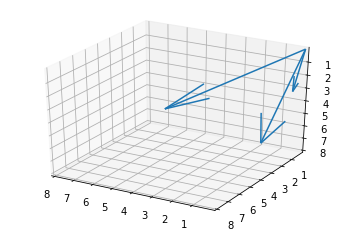

In [48]:
#span is all real numbers within 3d space

l = [1, 2, 3]
m = [-1, 0, 7]
n = [4, 8, 2]

ax = plt.axes(projection='3d')

ax.quiver3D(0,0,0,l,m,n)

ax.set_xlim(8)
ax.set_ylim(8)
ax.set_zlim(8)

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [49]:
p = [[1,2,3],
     [-1,0,7],
     [4,8,2]]

In [51]:
np.linalg.matrix_rank(p)

3

## 7.2 What does the rank of a matrix tell us?

There are 3 linearly independent vectors within the matrix. With the added information of the matrix length, we can determine whether there are linearly dependent/redundant vectors and take necessary action.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [59]:
v = np.array([1,3])
w = np.array([-1, 2])

In [64]:
L = v*w
L

array([-1,  6])

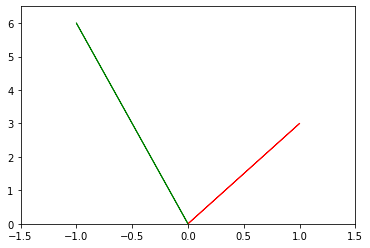

In [67]:
fig = plt.figure()

plt.arrow(0,0,v[0],v[1], color='r')
plt.arrow(0,0,L[0],L[1], color='g')

plt.xlim(-1.5,1.5)
plt.ylim(0,6.5)

plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

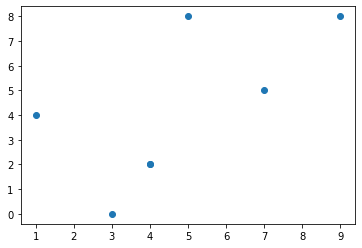

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()